# ML Fondamentals - MLDM first year Master

> Bloc en retrait


# Getting started with Scikit-Learn & k-nearest neighbors

## Scikit-Learn
Scikit-learn is a software written in Python, which requires the prior installation of the Python language and the *NumPy* and *SciPy* libraries (for scientific computing), in versions which must check certain compatibility constraints. On your personal machine, the easiest way is to install a full Python distribution, such as Anaconda (https://docs.anaconda.com/anaconda/install/), which includes most common libraries developed in Python, including the three mentioned above. On the PCs in the room, everything is normally installed...

The official site of the Scikit-learn software is: http://scikit-learn.org/stable/index.html

The online documentation is complete, and should be consulted whenever necessary:
 http://scikit-learn.org/stable/documentation.html
    
Tutorials are available at:
 http://scikit-learn.org/stable/tutorial/index.html

### Datasets in Scikit-Learn

A number of datasets are available in scikit-learn. It is also possible to generate artificial data or to recover external data (we will do that in the next tutorials).

Documentation for loading datasets:
http://scikit-learn.org/stable/datasets/

The datasets available in scikit-learn are: iris, boston, diabetes, digits, linnerud, sample images, 20newsgroups.
Each of these data sets is retrieved using the load_game-name command, which must first be loaded. For example, to retrieve the iris set:

In [2]:
from sklearn.datasets import load_iris  #importation of the command
irisData = load_iris()

We then end up with a variable that contains the dataset (here we called it *irisData*)

Dataset variables include a number of fields (not all are always defined): data, target, target_names, feature_names, DESCR:
- *.data* is an array of dimensions *(n,m)*. Each of the *n* rows corresponds to a piece of data, each of the *m* columns to an attribute
- *.target* stores the classes (labels/label) of each instance (in the supervised case): it is a vector of size *n* whose first value is the class of the data from the first row of the .data array, the second value is the class of the second row, and so on.
- *.target_names* contains the name of the classes
- *.feature_names* contains the name of the attributes
- *.DESCR* is a text describing the dataset.

In [3]:
help(irisData)

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __se

In [4]:
irisData.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
irisData.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
irisData.target_names
print(irisData.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Note that the type of all these elements is *array*, a very useful and central type in python for us.

##### The Iris dataset (Fisher, 1936)
Iris is a set of data introduced in 1936 by R. Fisher as an example of discriminant analysis. This set contains 150 examples of criteria observed on 3 different species of iris from Gaspésie (Setosa, Versicolor, Verginica). Each example is composed of four attributes (length and width of sepals in cm, length and width of petals in cm) and a class (species).


**Question.** Execute **one at a time** the following commands and understand what they do (you will have to reuse them).

In [7]:
#len(irisData.data)

# Récupère le nom des classes
#irisData.target_names[0]
#irisData.target_names[2]
#irisData.target_names[-1]

# si pas -1, on a un indexOutOfBound
#irisData.target_names[len(irisData.target_names)-1]

# dimension du dataframe
#irisData.data.shape


# récupère une donnée du dataframe avec ses index
#irisData.data[0]
#irisData.data[0][1]


# récupère les données de la première colonne dans un tableau 1D
#print(irisData.data[:,1], end="\n======\n")    # Celle-ci, il faut vraiment la comprendre !

# récupère dans un tableau 2D les cellules appartenant à la classe 0
print(irisData.data[irisData.target==0], end="\n======\n") # Et celle-ci aussi !!!
print(irisData.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1

In [8]:
len(irisData.data)

150

In [9]:
irisData.target_names[0]

'setosa'

In [10]:
irisData.target_names[2]

'virginica'

In [11]:
irisData.target_names[-1]

'virginica'

In [12]:
irisData.target_names[len(irisData.target_names)-1]

'virginica'

In [13]:
irisData.data.shape

(150, 4)

In [14]:
irisData.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [15]:
irisData.data[0][1]

3.5

In [16]:
irisData.data[:, 1]    # Celle-ci, il faut vraiment la comprendre !

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [17]:
irisData.data[irisData.target==0]    # Et celle-ci aussi !!!

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Got an error? Why ? Think...

And be sure to test all rows, even create new cells (or comment out rows that are already tested, or that generate errors)

##### Visualize data
SciKitLearn integrates the matplotlib library (http://matplotlib.org/) which offers many primitives for making drawings, and the pylab library, which integrates the NumPy, SciPy and Matplotlib libraries.

Run the following commands and understand what they do:

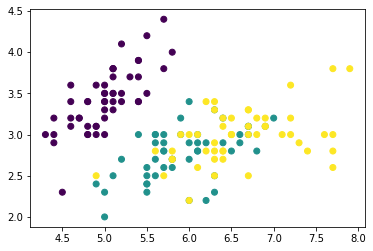

In [18]:
# Only for Notebook: allows the showing of the plots:
%matplotlib inline     

import matplotlib.pyplot as plt        #import 'pyplot' and replace its name by 'plt'
X = irisData.data
Color = irisData.target
abscisse = 0
ordonnee = 1

plt.scatter(X[:, abscisse], X[:, ordonnee], c=Color)   # Define the horizontal and vertical values and the color
plt.show()   

It's good but not great: it lacks information to be a real curve. We improve:

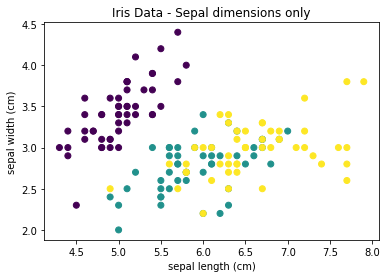

In [19]:
# Naming the horizontal axis
plt.xlabel(irisData.feature_names[abscisse])

# Naming the vertical axis 
plt.ylabel(irisData.feature_names[ordonnee])

# a title is always needed
plt.title("Iris Data - Sepal dimensions only")

plt.scatter(X[:, abscisse], X[:, ordonnee], c=Color)   
plt.show()


It's starting to look like something, isn't it? 2 small problems remain: the legend is missing to explain the color code, and the colors are not very beautiful (that's a matter of taste, but still). Here's a (slightly different) way to fix it:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2], {0, 1, 2}
features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


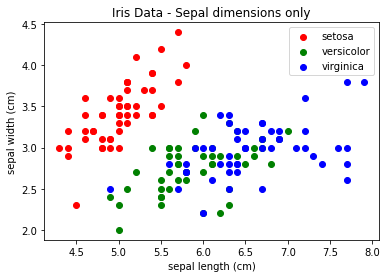

In [20]:
y = irisData.target
colors=["red","green","blue"]

# remove doubles
# differentes_target contain the number of class the dataset has.
differentes_target = set(irisData.target)
print(irisData.target, differentes_target, sep=", ")


# for each class we draw its points in a different color than the others.
for i in differentes_target:
	plt.scatter(
			X[y==i, abscisse], X[y==i, ordonnee], # coordinate
			color=colors[i],                      # color of the points
			label=irisData.target_names[i]        # legend for these points
			)

plt.legend()

print("features: ", irisData.feature_names)
plt.xlabel(irisData.feature_names[abscisse])
plt.ylabel(irisData.feature_names[ordonnee])


plt.title("Iris Data - Sepal dimensions only")
plt.show()

**Question.** The iris data is described by 4 attributes. There are 6 ways to look at 2 of them. By modifying the code above, visually determine the pair of attributes that seems best able to discriminate between the 3 classes of iris.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2], {0, 1, 2}


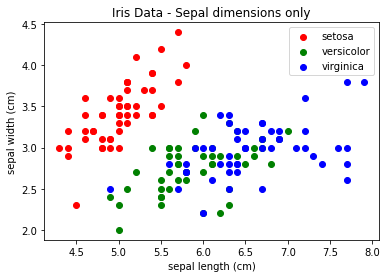

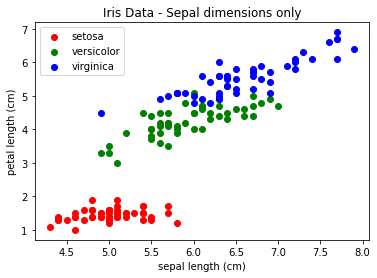

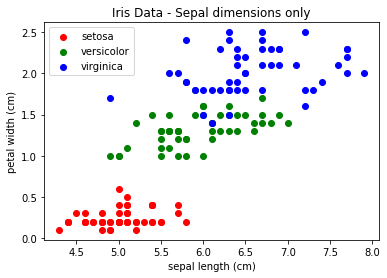

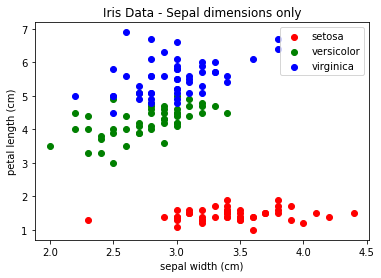

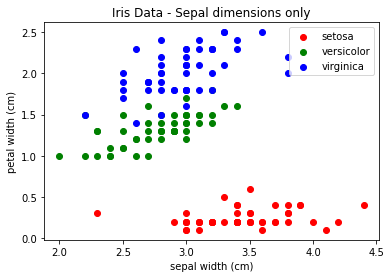

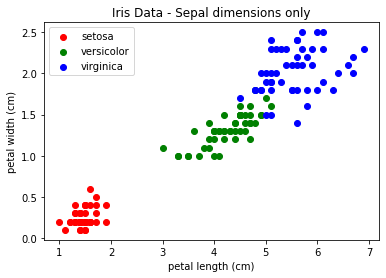

In [21]:
# You turn

import seaborn as sns

y = irisData.target
colors=["red","green","blue"]

# remove doubles
# differentes_target contain the number of class the dataset has.
differentes_target = set(irisData.target)
print(irisData.target, differentes_target, sep=", ")


# for each class we draw its points in a different color than the others.
# draw the relation between all possible pairs of attributes
abscisse = 0
ordonnee = 1
nb_features = len(irisData.feature_names)


for abscisse in range(nb_features):
  for ordonnee in range(abscisse, nb_features):
    if(abscisse != ordonnee):
      for i in differentes_target:
        plt.scatter(
            X[y==i, abscisse], X[y==i, ordonnee], # coordinate
            color=colors[i],                      # color of the points
            label=irisData.target_names[i]        # legend for these points
            )

      plt.legend()
      plt.xlabel(irisData.feature_names[abscisse])
      plt.ylabel(irisData.feature_names[ordonnee])


      plt.title("Iris Data - Sepal dimensions only")
      plt.show()

We notice that the red class (setosa) is well separable on several figures but that the blue and green classes are not well separable. The "overlap" between these last two is particularly less on the figures ``petal width``/``petal length`` and ``petal width``/``sepal width``.

In [22]:
!pip install seaborn
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
print(irisData.target_names)

['setosa' 'versicolor' 'virginica']


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


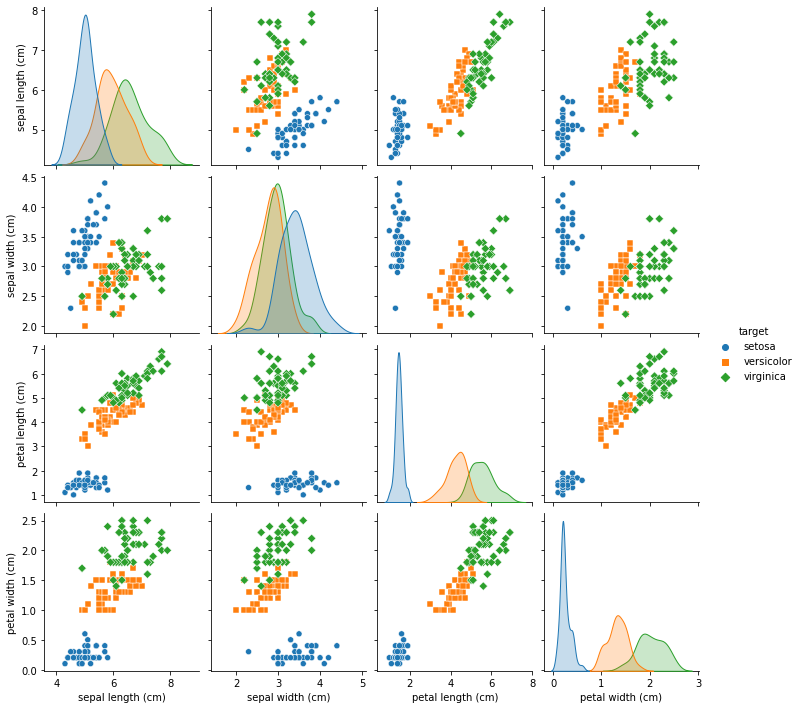

In [24]:
# test of seaborn library to draw graph

import seaborn as sns
# We need to use pandas DataFrame for using with seaborn
import pandas as pd

# 1. create the dataframe from the iris data set
iris_df = pd.DataFrame(irisData.data)

# 2. Name the colomns
iris_df.columns = irisData.feature_names

# 3. Use name of classes instead of number for better lissibility on graphs
iris_df["target"] = irisData.target
iris_df["target"] = iris_df["target"].apply(lambda x: irisData.target_names[x])

print(iris_df.head())

sns.pairplot(
    data= iris_df, # the array of data to plot
    hue= "target", # the colomn that contains the class
    markers=["o", "s", "D"], # give differents form of point for each class
)


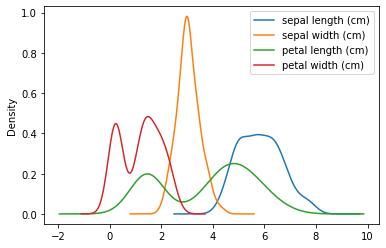

In [25]:
iris_df.plot(
    kind="kde",
)

## k nearest neighbors
Scikit-learn documentation on $k$ nearest neighbors can be found here: http://scikit-learn.org/stable/modules/neighbors.html


Before you start, check the Python package versions:

In [26]:
import sys
import numpy as np # importation du package numérique
import matplotlib
import sklearn

print('python: {} (version 3 obligatory)'.format(sys.version))
print('numpy: {} (version advised but not obligatory: 1.21.5)'.format(np.__version__))
print('matplotlib: {} (version advised but not obligatory: 3.0.0 at least)'.format(matplotlib.__version__))
print('scikit-learn: {} (version advised but not obligatory: 0.19 at least)'.format(sklearn.__version__))


python: 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0] (version 3 obligatory)
numpy: 1.21.6 (version advised but not obligatory: 1.21.5)
matplotlib: 3.2.2 (version advised but not obligatory: 3.0.0 at least)
scikit-learn: 1.0.2 (version advised but not obligatory: 0.19 at least)


A recent version of Matplotlib is particularly desirable so that the display of images is done correctly, without "smoothing".

### Data *digits*
In the first part of this lab, we will use data already present in scikit-learn, like the Iris data from the first lab.

These data are well known in learning, under the names of MNIST. They are composed of images of handwritten numbers at a resolution of 8*8. In scikit-learn, they are called digits:

In [27]:
from sklearn.datasets import load_digits

digitsData=load_digits() # data set digits
X=digitsData.data # examples, a array numpy, each element is also an aray
y=digitsData.target # Classes

We can look at some information:

In [28]:
print(X.dtype, X.shape)
print(y.dtype, y.shape)

print(X[:5])
print(y[:20])

float64 (1797, 64)
int64 (1797,)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0

Each datum is therefore an image of 8 pixels by 8 pixels, in gray level (256 possible shades), stored in the form of a vector of dimension 64 as a row of the matrix *X* (there are 1797 images) and with the value of the associated class stored in a separate *y* vector (as for Iris). But we can still look at the initial image:

The vector of the image at index 42:  [ 0.  0.  0.  0. 12.  5.  0.  0.  0.  0.  0.  2. 16. 12.  0.  0.  0.  0.
  1. 12. 16. 11.  0.  0.  0.  2. 12. 16. 16. 10.  0.  0.  0.  6. 11.  5.
 15.  6.  0.  0.  0.  0.  0.  1. 16.  9.  0.  0.  0.  0.  0.  2. 16. 11.
  0.  0.  0.  0.  0.  3. 16.  8.  0.  0.]
[[ 0.  0.  0.  0. 12.  5.  0.  0.]
 [ 0.  0.  0.  2. 16. 12.  0.  0.]
 [ 0.  0.  1. 12. 16. 11.  0.  0.]
 [ 0.  2. 12. 16. 16. 10.  0.  0.]
 [ 0.  6. 11.  5. 15.  6.  0.  0.]
 [ 0.  0.  0.  1. 16.  9.  0.  0.]
 [ 0.  0.  0.  2. 16. 11.  0.  0.]
 [ 0.  0.  0.  3. 16.  8.  0.  0.]]


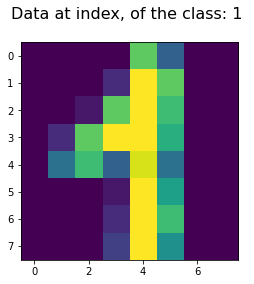

In [29]:
import matplotlib.pyplot as plt  # package for visualisation
%matplotlib inline  

donnee = X[42,:] # we get a row, that is, a datum
classe = y[42]   # et sa classe
print("The vector of the image at index 42: ", donnee)

image = np.reshape(donnee, (8,8)) # we put the 8 peice of size 8 one below the other
print(image) # show the matrix of pixel
plt.imshow(image) # show the corresponding image
plt.title('Data at index, of the class: %i \n' % classe, fontsize = 16) # with a title
plt.show()


We can make more interesting displays, example on the first 5 data:

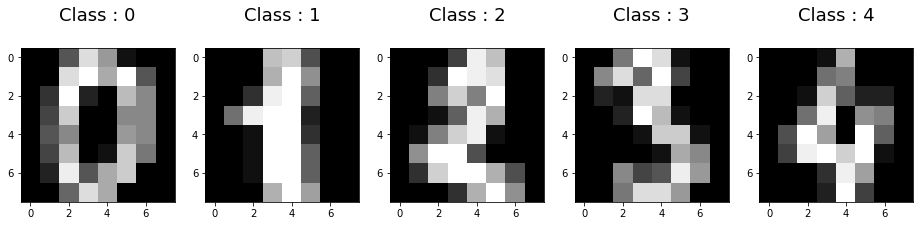

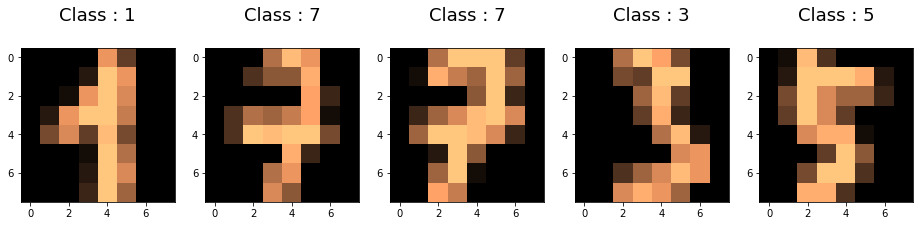

In [30]:
plt.figure(figsize=(16,4))
for index in range(5):
    image = X[index, :]
    classe = y[index]
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Class : %i\n' % classe, fontsize = 18)
plt.show()
    
plt.figure(figsize=(16,4))
for index in range(5):
    image = X[42+index, :]
    classe = y[42+index]
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap="copper")
    plt.title('Class : %i\n' % classe, fontsize = 18)  
plt.show()


### Creating and training a classifier

Our objective is now to learn, on the basis of a sample of "digit" images, a classifier capable of predicting the digit that corresponds to a new image. We will use the method of $k$-nearest neighbors for this learning. It is implemented in a package called *neighbors*. Consider the following set of instructions:

In [31]:
from sklearn import neighbors as nn # importation du package d'algorithmes travaillant sur les points voisin of the algorithm
#help(nn.KNeighborsClassifier) # a usefull instruction

Nice, right? This type of instruction can be used for any Python class.

Let's continue exploring the $k$-nearest neighbor. In the following series of instructions, we show how a classifier can be learned from labeled data, and how to perform the prediction on a new example.

The functions *predict* and *fit* exist **for all classifiers** available in scikit-learn.

We note here the syntax of the predict function: we actually pass it an array of examples (here, an array with a single example consisting of 64 attributes), and it returns an array containing the predicted class for each example of the array in setting. Obviously, in the input and output arrays, the indices of the predicted classes correspond to the indices of the input examples!

Thus, when we know that we only apply *predict* to a single example, a final selection [0] as below returns the first (and only) component of the result array.

In [32]:
nb_voisins = 15 # fixe the number of neighbors, from 1 to the total number of data
clf = nn.KNeighborsClassifier(nb_voisins) #the classifieur is created but empty so far 

print(clf)

clf.fit(X, y) #  training on the labelled data
un_exemple = X[50, :]  # get data at index 50
print('prediction for this example: ',
      clf.predict(un_exemple.reshape(1,-1))) 

print('prediction for this example: ', clf.predict(un_exemple.reshape(1,-1))[0])

KNeighborsClassifier(n_neighbors=15)
prediction for this example:  [2]
prediction for this example:  2


For some types of classifiers, one can even retrieve the probability that the classifier assigns to the example belonging to each possible class. The *predict_proba* function works like the *predict* function, except that the output array contains, for each example in the input array, a probability array of the same size as the number of classes .

In [33]:
autre_ex = X[123, :] # take another image

# probability to be in every class for this datum:
print(clf.predict_proba(un_exemple.reshape(1,-1))[0]) 

print(clf.predict_proba(autre_ex.reshape(1,-1))[0]) # idem 

[0.  0.  0.8 0.  0.  0.  0.  0.  0.2 0. ]
[0.         0.46666667 0.         0.         0.         0.
 0.         0.         0.53333333 0.        ]


**Question** What class do you think will be assigned to the second example, and why? Indicate below the instruction to execute to verify.

8 has the higher probabillity so it will be asign to this example.
We can verify that we the function predict, that output the label that our KNN model asign to the example.


In [34]:
# your turn
print(clf.predict(autre_ex.reshape(1,-1))[0])

8


A first way to assess the quality of a classifier is to test it on the examples that were used to learn it. We therefore use the same function *predict*, applied to the array of training examples.

In [35]:
y_predits = clf.predict(X) # vector of predicted class for all example in X
print(X[y_predits!=y]) # the wrongly classified data

[[ 0.  0. 12. ... 10.  0.  0.]
 [ 0.  0.  6. ...  0.  0.  0.]
 [ 0.  0.  0. ... 16. 12.  0.]
 ...
 [ 0.  0.  7. ...  0.  0.  0.]
 [ 0.  1.  7. ...  6.  0.  0.]
 [ 0.  0.  5. ...  3.  0.  0.]]


**Question** To find out the possible origin of the prediction errors, loop through all the images for which the prediction is wrong, displaying each time the 8x8 image with the image index, the class original and the predicted class (for this, we can use the function *numpy.argwhere* with a little judgment).

In [36]:
print(y_predits[y_predits != y])
print(y)

[9 7 1 1 1 1 3 9 1 8 1 7 1 7 3 1 7 6 1 5 8 3 7 5 5 1]
[0 1 2 ... 8 9 8]


In [37]:
print(X)
print(X.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


In [38]:
# The colum [:, 0] indicate the number of the image with wrong prediction
# The column [:, 1] indicate the wrong pixel for the image
print(np.argwhere(X[y_predits!=y]))

# NB: doesn't give the index, but the pixels of images that are labeled wrong.

[[ 0  2]
 [ 0  3]
 [ 0 10]
 ...
 [25 59]
 [25 60]
 [25 61]]


In [39]:
# The number of wrong predictions
print(len(set(np.argwhere(X[y_predits!=y])[:, 0])))

26


In [40]:
index_errors_of_labelling = np.argwhere(y_predits != y).reshape(1, -1)[0]
print(index_errors_of_labelling)

[   5   69   77   87  129  170  378  421  492  547  683  746  794  891
  899  905 1118 1361 1553 1582 1611 1658 1660 1662 1765 1790]


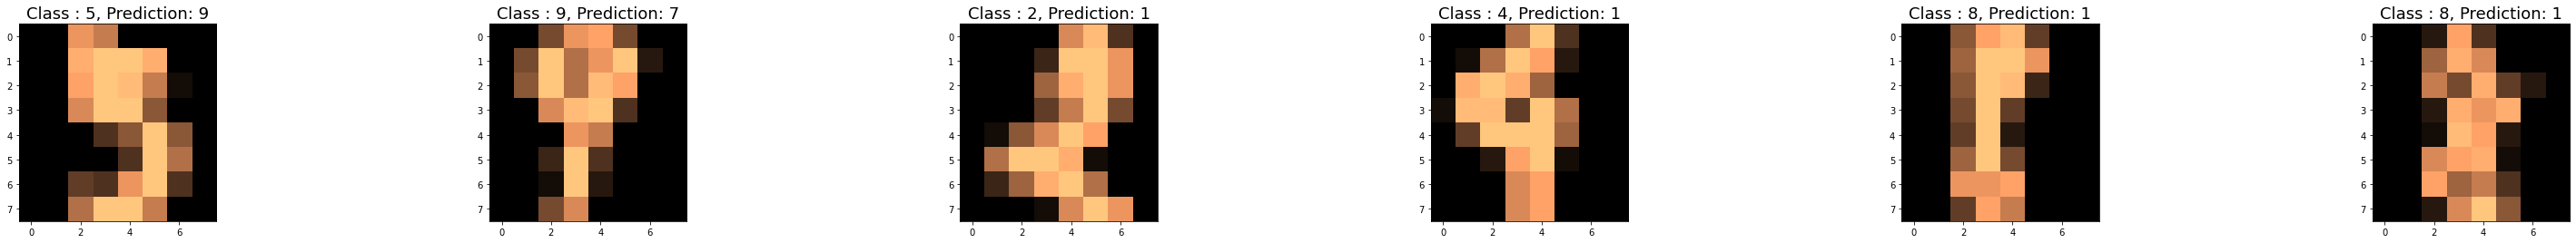

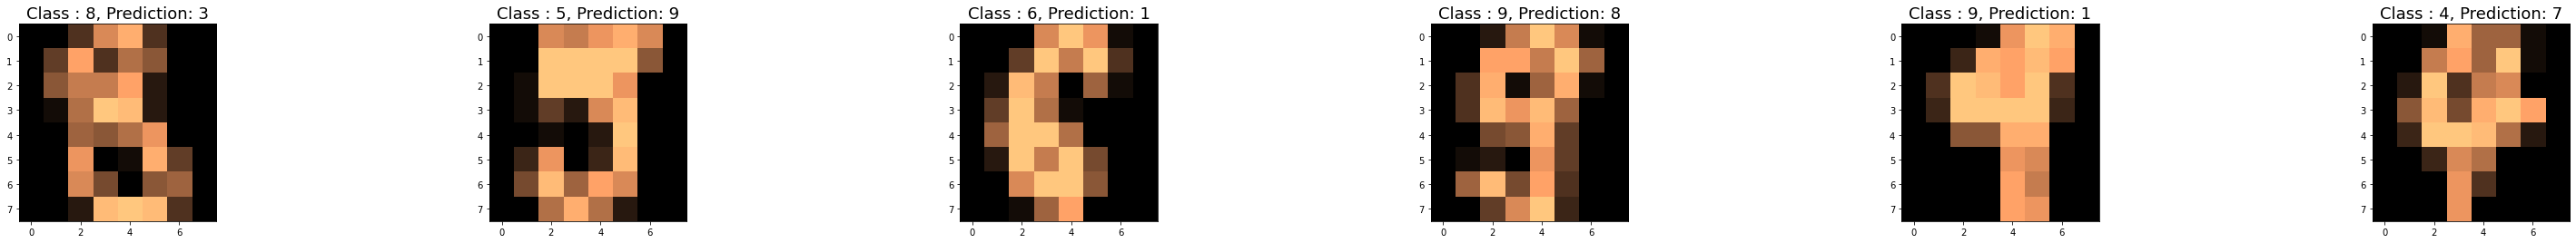

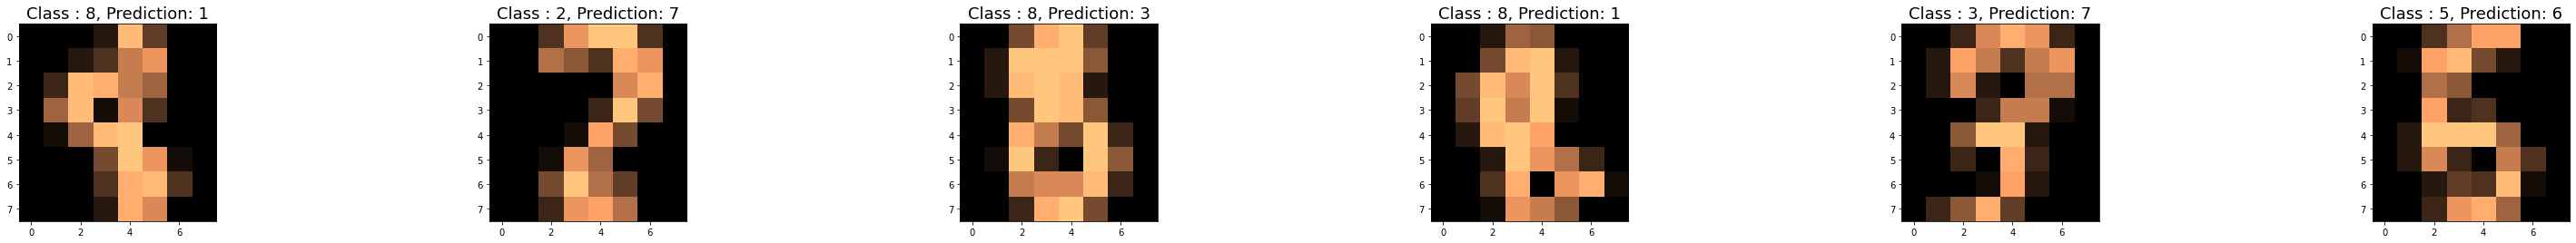

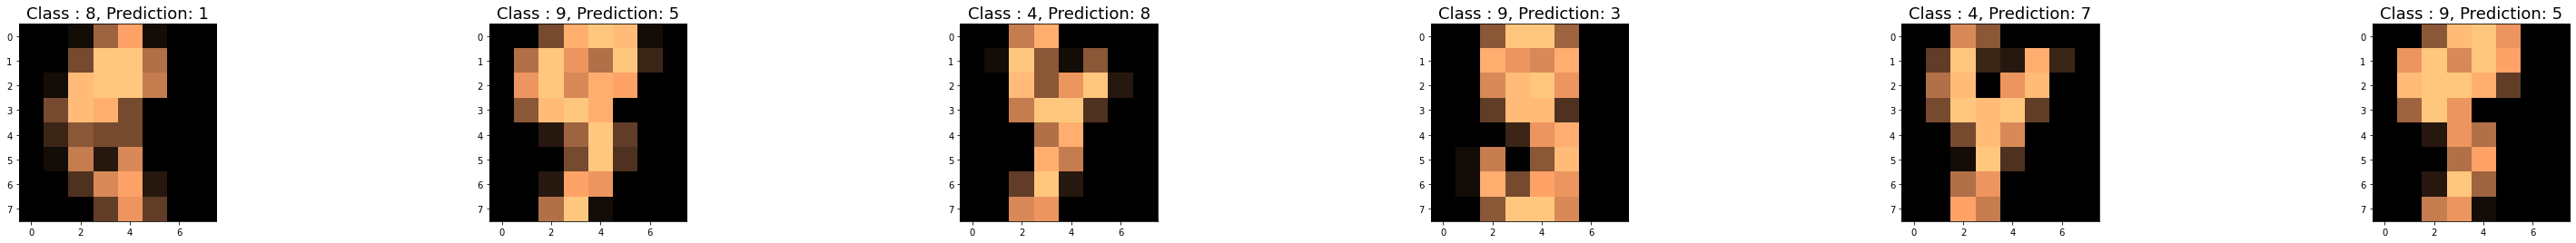

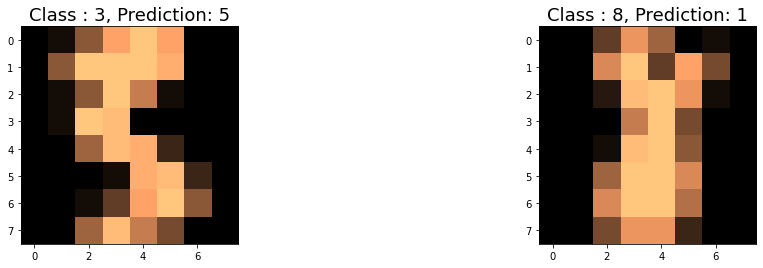

In [41]:
# set the size of the graphics
plt.figure(figsize=(240,4))

# draw all images that have been labeled wrong
row=0
col=0
n = len(index_errors_of_labelling)
num_subplot=1

for i in index_errors_of_labelling:
    image = X[i, :]
    classe = str(y[i])
    prediction = str(y_predits[i])

    plt.subplot(1, n, num_subplot)
    num_subplot+=1
    #plt.subplots(nrows=row, ncols=col)
    

    plt.imshow(np.reshape(image, (8,8)), cmap="copper")
    plt.title('Class : '+classe+', Prediction: '+prediction, fontsize = 18) 

    col+=1
    if col > 5:
      col= 0
      row+= 1
      plt.show()
      plt.figure(figsize=(240,4))



plt.show()



Each classifier has a score function, which makes it possible to compare the predictions of a set of examples X for which the labels y are known: the function calculates the rate of correct classification.

In [42]:
help(clf)

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors o

In [43]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_samples_fi

In [44]:
print('Accuracy (good classification rate) :', clf.score(X,y)) 


Accuracy (good classification rate) : 0.9855314412910406


It is easily diverted to obtain the error rate: do it (you must obtain 0.01446855...)!

In [45]:
# your turn
print('Error rate : ', 1-clf.score(X, y))

Error rate :  0.014468558708959356


### Variation in the number of neighbors

The $k$-nearest neighbors algorithm works with several hyper-parameters (parameters of the algorithm, not of the learned model): the value of $k$ is one of these parameters. Make a program that varies this hyper-parameters in an interval including values ​​between 1 and 15, and store the evolution of the learning error (that calculated on the learning sample), then make a curve with the values ​​of k on the abscissa, and the errors on the ordinate.

To do this, we can use the function for constructing an array *numpy.arange* (see documentation), the function *len(X)* which returns the size of an array to a dimension. For the curve, we will simply use *plot(abs, ord)* from the *pyplot* package of *matplotlib*, as seen in the first part.

In [46]:
# Run the algorithm of KNeighbors for differents number of neighbors
# and collect the learning error of each case

learning_errors = []

for nbvoisins in range(1,16):
  # create the model
  clf = nn.KNeighborsClassifier(nbvoisins)

  # train the model
  clf.fit(X, y)

  # compute the error rate
  learning_errors += [1-clf.score(X, y)]
  print(nbvoisins, ": ", 1-clf.score(X, y))

1 :  0.0
2 :  0.008903728436282732
3 :  0.006677796327211993
4 :  0.007790762381747363
5 :  0.009460211463550361
6 :  0.01001669449081799
7 :  0.009460211463550361
8 :  0.01057317751808573
9 :  0.01112966054535336
10 :  0.014468558708959356
11 :  0.011686143572620988
12 :  0.012799109627156358
13 :  0.013355592654423987
14 :  0.013912075681691727
15 :  0.014468558708959356


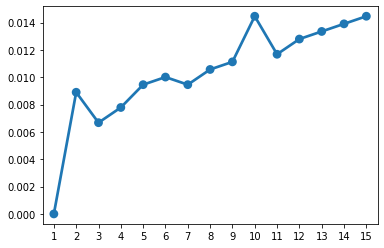

In [47]:
# Plot the learning errors collected in the last cell.
import seaborn as sns

sns.pointplot(
    x = [i for i in range(1, 16)],
    y = learning_errors,
)


At 1 neighbor we have the best error rate (0), when k increase it increase the error made by the model.
For k=1, it choose the correct point because we train the model on the same data that we made the test
to get the error rate. (overfitting to the data)

What do you observe? At which value of k do we reach a better classifier? What is globally, on this dataset, the influence of $k$? What exactly is happening for $k=1$?

## Estimating the real error of learned classifier

When the score of the learned classifier is evaluated on the training set, it is generally over-estimated (**why?**) and therefore very unreliable. The best way to evaluate a classifier is to calculate its score on a test sample, independent of the training sample but generated in the same
terms. When we have a single set of examples (as is the case with *digits*), we must therefore:

*split the data into a training subset and a test subset,* train a classifier on the training set
*evaluate this classifier on the test set (here we have an evaluation of the real error, which remains unstable since it depends on the splitting performed)

If the data is sparse, as is the case for the*digits*dataset, this assessment is likely to be pessimistic (do you have any idea why? If so, explain, if not think! ).

Scikit-learn comes with a whole set of tools to evaluate this error. For the moment, we will only use the function which allows to divide a sample into two parts (attributes and classes): it is the function*train_test_split* of the package *model_selection*, which we apply below on Iris (we only print the first three examples of each subsample, with their labels):

If the data is sparse, it will be difficult to have a good split for the data set to represent the sparseness.

In [49]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=42) 
print(Xtrain[:3,:], ytrain[:3], sep="\n")
print(Xtest[:3,:], ytest[:3], sep="\n")


[[ 0.  0.  2. 15. 15. 16. 11.  0.  0.  0.  8. 16. 11.  3.  0.  0.  0.  0.
  13.  9.  0.  0.  0.  0.  0.  5. 16.  3.  9. 11.  3.  0.  0. 10. 15. 15.
  16. 16. 11.  0.  0.  6. 16. 10.  7. 16.  5.  0.  0.  0.  3.  4. 15.  8.
   0.  0.  0.  0.  4. 15.  7.  0.  0.  0.]
 [ 0.  5. 16. 15.  3.  0.  0.  0.  0. 11. 14. 11. 11.  0.  0.  0.  0.  8.
  11.  4. 16.  0.  0.  0.  0.  0.  0.  4. 13.  0.  0.  0.  0.  0.  0.  8.
  12.  0.  0.  0.  0.  0.  0. 13.  9.  5.  1.  0.  0.  1. 11. 16. 16. 16.
  10.  0.  0.  5. 16. 14.  8.  6.  1.  0.]
 [ 0.  0.  4. 13.  8.  0.  0.  0.  0.  0. 13. 16. 15.  7.  0.  0.  0.  3.
  16.  9.  6. 15.  6.  0.  0.  8. 14.  0.  0.  4.  8.  0.  0.  8. 12.  0.
   0.  4.  8.  0.  0.  4. 12.  0.  0. 11.  6.  0.  0.  0. 14. 10. 12. 14.
   1.  0.  0.  0.  7. 15. 11.  2.  0.  0.]]
[5 2 0]
[[ 0.  0.  0.  7. 12.  0.  0.  0.  0.  0.  4. 16.  8.  0.  0.  0.  0.  0.
  12. 11.  0.  0.  0.  0.  0.  0. 15. 10.  8.  6.  1.  0.  0.  0. 15. 16.
   8. 10.  8.  0.  0.  0. 14.  7.  0.  0. 12.  0

Here, we produce a split in which the training set represents 75% of the initial sample, and the test sample represents 25% of the initial data.

Inspired by this splitting mode, write a sequence of instructions to split *digits* into two equal parts, learn a 3-nearest neighbor on the first subsample, and test it on the second: you get an **estimate** of the actual error. Are you getting the same learning error as measured earlier?

In [50]:
# your turn
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=1)

# learn a 3-NeareastNeighbors
clf = nn.KNeighborsClassifier(3)
clf.fit(Xtrain, ytrain)

# compute the error on the test set
error = 1 - clf.score(Xtest, ytest)
print(error)


0.017797552836484987


Now vary $k$ again, and for each value, report the true error estimated based on a train_test_split of 70%, 30%; draw the curve. Observe carefully the differences in the values ​​of the learning and real errors: why are they different? What do you notice?

In [51]:
# Learn a KNN model with a variating number of neighbors and then use a test
# set to compute the error of the model

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=5)
learning_errors = []

for nbvoisins in range(1, 16):
  # create
  clf = nn.KNeighborsClassifier(nbvoisins)

  # learn the model
  clf.fit(Xtrain, ytrain)

  # compute the error rate
  error = 1-clf.score(Xtest, ytest)
  learning_errors += [error]
  print(error)


0.011111111111111072
0.012962962962962954
0.0092592592592593
0.014814814814814836
0.014814814814814836
0.014814814814814836
0.014814814814814836
0.014814814814814836
0.014814814814814836
0.01666666666666672
0.020370370370370372
0.01851851851851849
0.024074074074074026
0.024074074074074026
0.025925925925925908


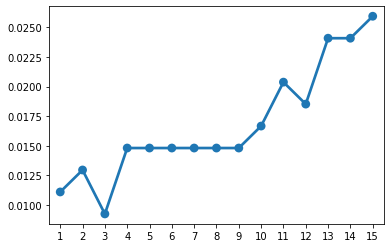

In [52]:
# draw the error rate depending on the number of neighbors
sns.pointplot(
    x = [i for i in range(1, 16)],
    y = learning_errors
)

Now the model is tested on unknown data that are not used for its trainning, thus 1 neighbors don't have 100% accuracy because it no longer correspond to the exact prediction learned.
With 3 neighbors it is the most accurate.
We notice that the erorr rate still increase with the number of neighbor, that can be explain by the fact that by expanding the area of neighbors we looking at farther neighbors and then can deduce the wrong class.
We also notice the now that we test our model on a unknow data set the error rate is much important than before.

### Variation around the metric
Beyond the number of neighbors, another hyper-parameter is the metric used to calculate the distance between examples. By default, the Minkowski distance is used, with the $p=2$ parameter indicating that we are considering the Euclidean distance. With $p=1$, we would have the distance of manhattan, and in general, with p>0, the distance used is $d^p$:

$$d^p(x, x')=(\sum_{i=1}^d |x_i - x'_i|^p)^{\frac{1}{p}}$$

Write a program to vary the distance used to assess its impact on performance, also varying $k$. Plot the 3 curves on the same plot (cf. doc of *plot* to see how to do it), one for each value of $p$ among ${1,2,5}$.

[[0.012962962962962954, 0.011111111111111072, 0.005555555555555536], [0.01666666666666672, 0.012962962962962954, 0.011111111111111072], [0.014814814814814836, 0.0092592592592593, 0.014814814814814836], [0.014814814814814836, 0.014814814814814836, 0.012962962962962954], [0.014814814814814836, 0.014814814814814836, 0.012962962962962954], [0.014814814814814836, 0.014814814814814836, 0.012962962962962954], [0.014814814814814836, 0.014814814814814836, 0.007407407407407418], [0.014814814814814836, 0.014814814814814836, 0.012962962962962954], [0.01666666666666672, 0.014814814814814836, 0.012962962962962954], [0.01666666666666672, 0.01666666666666672, 0.01666666666666672], [0.020370370370370372, 0.020370370370370372, 0.01666666666666672], [0.022222222222222254, 0.01851851851851849, 0.014814814814814836], [0.025925925925925908, 0.024074074074074026, 0.01666666666666672], [0.024074074074074026, 0.024074074074074026, 0.01666666666666672], [0.029629629629629672, 0.025925925925925908, 0.01666666666

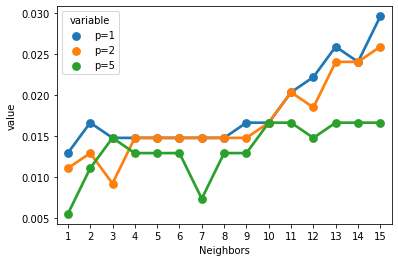

In [53]:
# your turn
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=5)
learning_errors = []

for nbvoisins in range(1, 16):
  error_for_nbvoisin = []
  for p in [1, 2, 5]:
    # create
    clf = nn.KNeighborsClassifier(nbvoisins, p=p)

    # learn the model
    clf.fit(Xtrain, ytrain)

    # compute the error rate
    error = 1-clf.score(Xtest, ytest)
    error_for_nbvoisin += [error]

  learning_errors += [error_for_nbvoisin]
  #print(error_for_nbvoisin)

print(learning_errors)

abs = [i for i in range(1, 16)]

# convert to an nparray to do some slicing on the columns
learning_errors_np = np.array(learning_errors)

# make a dataframe to draw the curves with seaborn
points_df = pd.DataFrame({
    'Neighbors': abs,
    'p=1': learning_errors_np[:, 0],
    'p=2': learning_errors_np[:, 1],
    'p=5': learning_errors_np[:, 2],
})

sns.pointplot(
    x = 'Neighbors',
    y = 'value',
    hue = 'variable',
    data=pd.melt(points_df, ['Neighbors'])
)


### Confusion Matrix
Now that you have selected the best values ​​for $k$ and $p$, you can analyze the performance of your best classifier in more detail. To do this, construct the confusion matrix, of size $10 \times 10$, in which the element $(i,j)$ corresponds to the number of times an example of a label $i$ was predicted with a label $j$. What are the common confusions?

In [59]:
# your turn
# best value found: k=1, p=5
clf = nn.KNeighborsClassifier(15, p=1)
clf.fit(Xtrain, ytrain)
y_predits = clf.predict(Xtest)
print(clf.score(Xtrain, ytrain))
sklearn.metrics.confusion_matrix(y_predits, ytest, labels=[i for i in range(0, 10)])

0.9753381066030231


array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  1,  1,  0,  3,  0],
       [ 0,  0, 56,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 62,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0, 58,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  1,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 47]])

**Optional.**
An interesting manipulation to do is to flip the images by rotating them 180º: in this way, the 6s then look like 9s and vice versa, the 0s remain 0s, and the other digits sometimes give undefined characters . Experiment with a few examples by displaying them to find how to flip an image, then apply a k-NN like this: learn on the entire set of original images, test on the set of all returned images, display the matrix of confusion to see the extent to which 6s are recognized as 9s and observe other phenomena.

In [55]:
# your turn
# take the transpose of each image: